# CNN (Convolutional Neural Network) en procesamiento de imágenes

Las redes neuronales convolucionales son ampliamente usadas en la clasificación y segmentación de imágenes lo que está directamente relacionado con la capacidad de este tipo de redes para extraer características de alto nivel en las imágenes lo que les permite reconocer diferentes particularidades y así proporcionar la información necesaria para tomar decisiones (clasificación) o reconstruir un mapa de características (segmentación). En la imagen se observa una arquitectura de red convolucional para clasificación donde la primera etapa corresponde a la extracción de características de la imagen. Una vez se extraen las características, estas pasan a través de un clasificador el cual se encarga de tomar una decisión (en base a las características extraídas) definiéndola con la probabilidad más alta entre las clases evaluadas.

<div style="width:100%;text-align: center;">
<img src="https://i.imgur.com/9IA4lDo.png" width="900" height="400"/>
</div>

# Descripción base de datos

La base de datos con la que se trabaja contiene 112,120 imágenes de rayos X de tórax frontales para 30,805 pacientes, se etiquetan hasta 14 enfermedades diferentes donde cada paciente puede tener o no varias enfermedades. Las imágenes tienen resolución 1024x1024. Por cuestiones de disminuir el tiempo de entrenamiento, en los proximos pasos, la base de datos será reducida en un 90% y se trabajará con solo una etiqueta la cual indica si la imagen contiene una patología o no.

# Configuración

In [1]:
# Importaciones necesarias
import pandas as pd # Librería para el manejo de datos
import numpy as np # Librería para calculo y manejo de vectores
from glob import glob # Emparejamiento de rutas de archivos
import matplotlib.pyplot as plt # Librería de graficación
import cv2 # Librería para el manejo de imágenes y visión por computadora
import os # Librería para el manejo de rutas y conexiones con el sistema operativo
import seaborn as sns # Mejoramiento de las gráficas
sns.set_theme()
sns.set(font_scale = 2)

from ipywidgets import interact # Herramienta de interacción

In [2]:
df = pd.read_csv('../input/data/Data_Entry_2017.csv') # Leer datos como CSV 

diseases = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
#Number diseases
for disease in diseases :
    df[disease] = df['Finding Labels'].apply(lambda x: 1 if disease in x else 0) # Etiqueta si es patología o no

df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,0,0,0,0,1,0,0,0,0,1
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,0
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,0
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,0


# Extraemos las rutas de las imágenes y las etiquetas de cada una de ellas.

Las etiquetas serán:
- 0 para aquellas imagenes que no presentan una patología.
- 1 para alquellas imágenes de pacientes con alguna patología.

In [3]:
labels = df[diseases].to_numpy()
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('..', 'input','data','images*','images','*.png'))} # Ubica la ruta de las imágenes en un diccionario
print('Images found:', len(all_image_paths))



df['Path'] = df['Image Index'].map(all_image_paths.get) # Reemplaza la columna 'Image Index' por las rutas en el diccionario anterior
files_list = df['Path'].tolist() # Convierte la columna anterior en una lista

labelB = (df[diseases].sum(axis=1)>0).tolist() # Convierte en lista la columna que contiene la información de patología o no
labelB = np.array(labelB, dtype=int)

del df # Elimina el DataFrame creado anteriormente

df = pd.DataFrame({'path':files_list,
                   'labels':labelB}) # Crea un nuevo DataFrame con las listes definidas
df['labels'] = df['labels'].astype(str) # Define el nombre de las columnas como Strings o 'letras'
df.head(100) # Primeras 100 muestras del DataFrame

Images found: 112120


,path,labels
0,../input/data/images_001/images/00000001_000.png,1
1,../input/data/images_001/images/00000001_001.png,1
2,../input/data/images_001/images/00000001_002.png,1
3,../input/data/images_001/images/00000002_000.png,0
4,../input/data/images_001/images/00000003_000.png,1
...,...,...
95,../input/data/images_001/images/00000020_002.png,1
96,../input/data/images_001/images/00000021_000.png,1
97,../input/data/images_001/images/00000021_001.png,1
98,../input/data/images_001/images/00000022_000.png,0


# División del dataframe en dos conjuntos
* Train: Conjunto de entrenamiento (con su conjunto de validación)
* Test: Conjunto de prueba

In [4]:
from sklearn.model_selection import train_test_split # Función para separar el conjunto de entrenamiento y de test.

df,_ = train_test_split(df,test_size=0.9,stratify=df['labels']) # Se utiliza solo el 10% de los datos

df_train,df_test = train_test_split(df,test_size=0.3,stratify=df['labels'],random_state=1993) # Separa 70% para train y 30% para test
df_train,df_val = train_test_split(df_train,test_size=0.3,stratify=df_train['labels'],random_state=1993) # Del 70% anterior saca 30% para validación
print('Conjunto de entrenamiento:', df_train.shape)
print('Conjunto de validación en entrenamiento:', df_val.shape)
print('Conjunto de de prueba:', df_test.shape)

Conjunto de entrenamiento: (5493, 2)
Conjunto de validación en entrenamiento: (2355, 2)
Conjunto de de prueba: (3364, 2)


# Data Augmentation
La técnica conocida como 'Data Augmentation' es una herramienta de aumento de datos ampliamente utilizada en el mundo de la inteligencia artifical. Esta técnica consiste en generar nuevos datos a partir de datos existentes o conocidos añadiendo pequeños cambios. En el caso de las imágenes se conocen diferentes tipos de modificaciones tales como rotaciones, traslaciones, cambios de brillo, cambios de tamaño, entre otros. Además de aumentar la cantidad de datos existentes (importante para el deep learning) esta técnica complementa a la generalización de la red ya que las redes neuronales profundas están bastante condicionadas a los datos, por lo que ver datos con diferentes características aporta de gran manera al aprendizaje de la red. Un ejemplo de esta técnica se muestra en la siguiente figura:

<div style="width:100%;text-align: center;">
<img src="https://i.imgur.com/bgSRAC8.png" width="800" height="400"/>
</div>



## Usando La funcion `ImageDataGenerator` para aplicar Data Augmentation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Generador de datos para el modelo
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img # Procesos para las imágenes

datagen = ImageDataGenerator(fill_mode='nearest', # Los pixeles fuera de los bordes toman el valor más cercano
                             rotation_range=20, # Rotación de 20 grados
                             rescale=1./255) # Reescala la intensidad de las imagenes a valores entre [0,1]



nimag = df.shape[0] # Número de muestras

@interact(nray_num=(0,nimag-1,1))
def plot_Data_Augmentation(nray_num):
    img_path = df['path'].iloc[nray_num] # Define una muestra
    img = load_img(img_path, target_size=(150, 150))  # Carga la imagen
    x = img_to_array(img)  # Convierte la imagen en numpy array con tamaño (150, 150, 3)
    x = x.reshape((1,) + x.shape)  # Numpy array con tamaño (1, 150, 150, 3)

    # Se generarán imagenes aleatorias indefinidas por lo que se utiliza 'break' para detener la iteración
    i = 0 
    plt.figure(figsize=(20,5))
    for batch in datagen.flow(x, batch_size=1):
        plt.subplot(1,5,i+1)
        imgplot = plt.imshow(array_to_img(batch[0]))
        plt.axis('off')
        i += 1
        if i % 5 == 0:
            break
    plt.show()

interactive(children=(IntSlider(value=5605, description='nray_num', max=11211), Output()), _dom_classes=('widg…

# Creando los Generadores de Datos

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255)#,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2, ## Diferentes aumentos de datos
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)

# El generador de prueba (test) no necesita un Data Augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

img_size = 128 # Tamaño deseado de las imágenes
batch_size = 128 # Cantidad de datos que se le entrega al modelo en cada iteración

train_generator = train_datagen.flow_from_dataframe(df_train,
                                                   x_col='path',
                                                   y_col='labels',
                                                   target_size=(img_size,img_size),# Se define el generador con los argumentos necesarios
                                                   batch_size = batch_size,
                                                   color_mode='grayscale',
                                                   class_mode = 'binary')
validation_generator = test_datagen.flow_from_dataframe(df_val,
                                                        x_col='path',
                                                        y_col='labels',
                                                        target_size=(img_size,img_size),
                                                        batch_size = batch_size,
                                                        color_mode='grayscale',
                                                        class_mode = 'binary')


Found 5493 validated image filenames belonging to 2 classes.
Found 2355 validated image filenames belonging to 2 classes.


In [7]:
from tensorflow.keras import layers # Define las capas de la aquitectura
from tensorflow.keras import Model # Define la arquitectura como un modelo
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Diferentes optimizadores

# Se define la entrada una imagen (128x128x1) en escala grises
img_input = layers.Input(shape=(img_size, img_size, 1))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

2022-10-26 06:35:08.265208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 06:35:08.266177: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 06:35:08.452169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 06:35:08.453081: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 06:35:08.453897: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0     

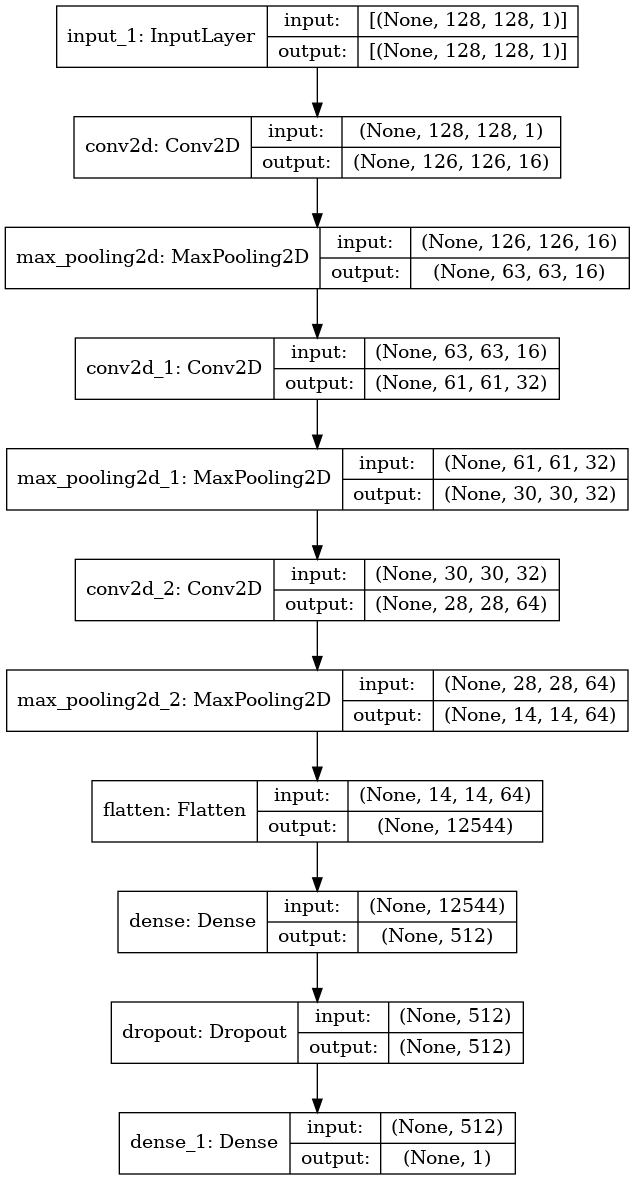

In [9]:
from tensorflow.keras.utils import plot_model # Herramienta para visualizar gráficamente el modelo
plot_model(model,
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True)

In [ ]:
history = model.fit(train_generator,
                  epochs = 10,
                  batch_size = batch_size,
                  validation_data = validation_generator, 
                  verbose = 2) # Información adicional

2022-10-26 06:35:17.480889: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-10-26 06:35:22.436775: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [ ]:
history.history # Listas de resultados en entrenamiento y validación

In [ ]:
# Accuracy para entrenamiento y validación
acc = history.history['acc']
val_acc = history.history['val_acc']
# Loss para entrenamiento y validación
loss = history.history['loss']
val_loss = history.history['val_loss']
loss
# # Número de epocas
# epochs = range(len(acc))

# # Gráfica de accuracy respecto a las epocas
# plt.plot(epochs, acc)
# plt.plot(epochs, val_acc)
# plt.title('Training and validation accuracy')

# plt.figure()

# # Gráfica de loss respecto a las epocas
# plt.plot(epochs, loss)
# plt.plot(epochs, val_loss)
# plt.title('Training and validation loss')

# Ver resultados

In [ ]:
Nimgs = df_test.shape[0] # Número total de imagenes

@interact(img_num = (0,Nimgs-1,1))
def test_on_image( img_num ):
    """ para datos de predicción >= .5 asignaremos 1, en caso contrario el valor será 0  
    """
    resized_image = cv2.resize(cv2.imread(df_test['path'].iloc[img_num],cv2.IMREAD_GRAYSCALE),(img_size,img_size)) # Reescala la imagen de test al tamaño deseado
    print(resized_image.shape)
    pred_pro = model.predict(resized_image.reshape(1,img_size,img_size,1))[0][0] # Utiliza el modelo para predecir si la imagen tiene una patología o no
    print(pred_pro)
    pred = 1. if pred_pro >= 0.5 else 0.
    
    # Muestra la imagen con la etiqueta esperada y la predicha
    fig = plt.figure(figsize = (5,5))
    plt.imshow(resized_image, cmap = "gray")
    plt.title("Etiqueta Real: {} \t Etiqueta Estimada: {}\t Confianza : {:.2%}".format(df_test['labels'].iloc[img_num],pred,pred_pro if pred==1 else 1-pred_pro))
    plt.axis("off")
    plt.show()
    return None

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator =  test_datagen.flow_from_dataframe(df_test,
                                                    x_col='path',
                                                    y_col=None,
                                                    target_size=(img_size,img_size),
                                                    batch_size = batch_size,
                                                    color_mode='grayscale',
                                                    class_mode = None) # class mode no retorna etiquetas del dataframe
pred = model.predict(test_generator) # Predice sobre un batch de datos

In [ ]:
from sklearn.metrics import classification_report # Herramienta para mostrar un reporte de las predicciones hechas
true_labels = df_test['labels'].to_numpy().astype(np.int8)
pred[pred >= .5 ] = 1
pred[pred < .5 ] = 0

print(classification_report(true_labels,pred))